In [112]:
import numpy as np
import matplotlib.pyplot as plt
def Invariant(x,y,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    return sigma *x -gamma*np.log(x)+beta*y-alpha*np.log(y)

def ExplicitEulerIntegration(x,y,dt,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    xNext=x+(alpha*x-beta*x*y)*dt
    yNext=y+(sigma*y*x-gamma*y)*dt
    return xNext,yNext

def ImplicitEulerIntegration(xn,yn,dt,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    ax=(1-alpha*dt)*sigma*dt
    bx=-((1-alpha*dt)*(1+gamma*dt)+sigma*dt*xn+beta*dt*yn)
    cx=(1+gamma*dt)*xn

    ay=(1-gamma*dt)*beta*dt
    by=((1-alpha*dt)*(1+gamma*dt)-beta*dt*yn-sigma*dt*xn)
    cy=-(1-alpha*dt)*yn

    xTildeNext=[(-bx+np.sqrt(bx**2-4*ax*cx))/(2*ax),(-bx-np.sqrt(bx**2-4*ax*cx))/(2*ax)]
    yTildeNext=[(-by+np.sqrt(by**2-4*ay*cy))/(2*ay),(-by-np.sqrt(by**2-4*ay*cy))/(2*ay)]
    

    xTildeNext=min(xTildeNext, key=lambda x:abs(x-xn))
    yTildeNext=min(yTildeNext, key=lambda y:abs(y-yn))
    
   
    xNext=xn+(alpha*xTildeNext-beta*xTildeNext*yTildeNext)*dt
    yNext=yn+(sigma*yTildeNext*xTildeNext-gamma*yTildeNext)*dt
    return xNext, yNext

def SymplecticEulerIntegration(xn,yn,dt,alpha=2/3,beta=4/3,sigma=1,gamma=1):
    # [explicit,inplicit ]
    xTildeNext=[xn*(1+dt*(alpha-(beta*yn)/(1-dt*(sigma*xn-gamma)))), xn/(1-dt*(alpha-beta*yn))]
    yTildeNext=[yn*(1+dt*(sigma*xn/(1-dt*(alpha-beta*yn))-yn)),yn/(1-dt*(sigma*xn-gamma))]
    xNext=xTildeNext[0]
    yNext=yTildeNext[1]
    
    #xTildeNext=min(xTildeNext, key=lambda x:abs(x-xn))
    #yTildeNext=min(yTildeNext, key=lambda y:abs(y-yn))

    #xNext=xn+(alpha*xTildeNext-beta*xTildeNext*yTildeNext)*dt
    #yNext=yn+(sigma*yTildeNext*xTildeNext-gamma*yTildeNext)*dt
    return xNext,yNext

def LotkaVolterraModel(function):
    alpha=2/3
    beta=4/3
    sigma=1
    gamma=1
    xn=1
    yn=1

    dt=0.05
    totalTime=20

    nIterations=int(totalTime/dt)
    iterations=np.arange(0,totalTime,dt)

    X=np.zeros(nIterations)
    Y=np.zeros(nIterations)
    I=np.zeros(nIterations)
    for i in range(nIterations):
        X[i]=xn
        Y[i]=yn
        xn,yn=function(xn,yn,dt)
        I[i]=Invariant(xn,yn)
        
    fig,ax=plt.subplots(1,3,figsize=(15,5))
    ax[0].plot(iterations,X,label="Preys")
    ax[0].plot(iterations,Y,label="Predators")
    ax[0].set_ylabel('Number of animals')
    ax[0].set_xlabel('time')
    ax[0].legend()


    ax[1].plot(iterations,I,label="I")
    ax[1].plot([iterations[0],iterations[-1]],[I[0],I[0]],'--',color='k',label="Starting I")
    ax[1].set_ybound([0,3])
    ax[1].set_ylabel('I(t)')
    ax[1].set_xlabel('t')


    ax[2].plot(X,Y)
    ax[2].annotate('', xy=(X[-1], Y[-1]), xytext=(X[-2], Y[-2]),
                arrowprops=dict( arrowstyle='->', mutation_scale=30))

    ax[2].set_xlabel('x preys')
    ax[2].set_ylabel('y predatores')

Chapter 14



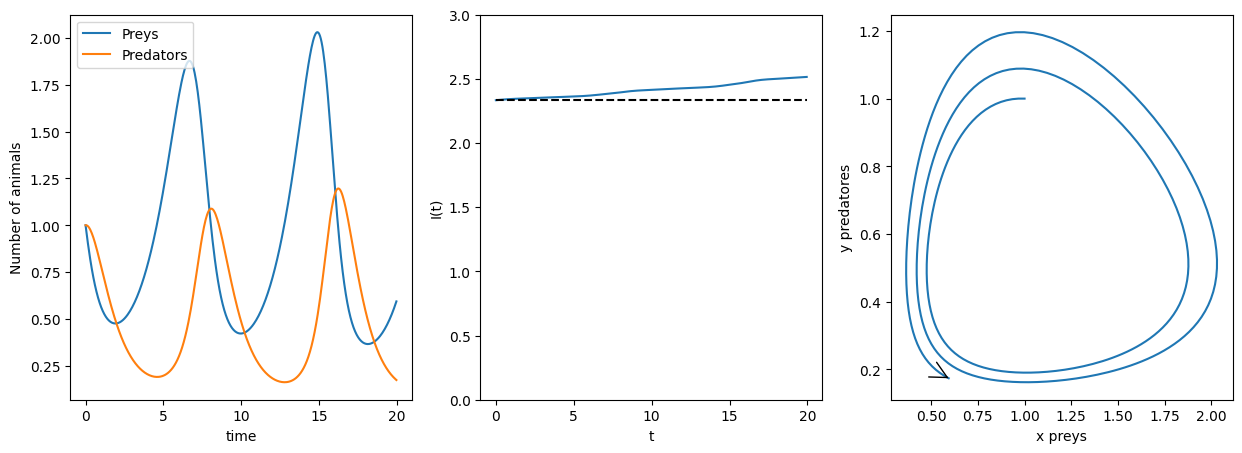

In [108]:
LotkaVolterraModel(ExplicitEulerIntegration)

12.4

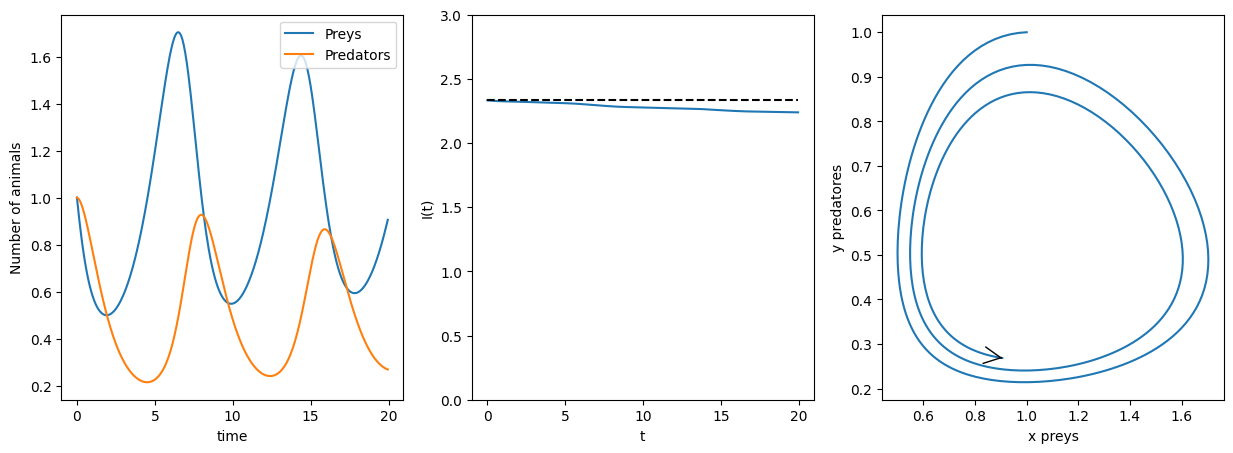

In [109]:
LotkaVolterraModel(ImplicitEulerIntegration)

In [110]:
14.5

14.5

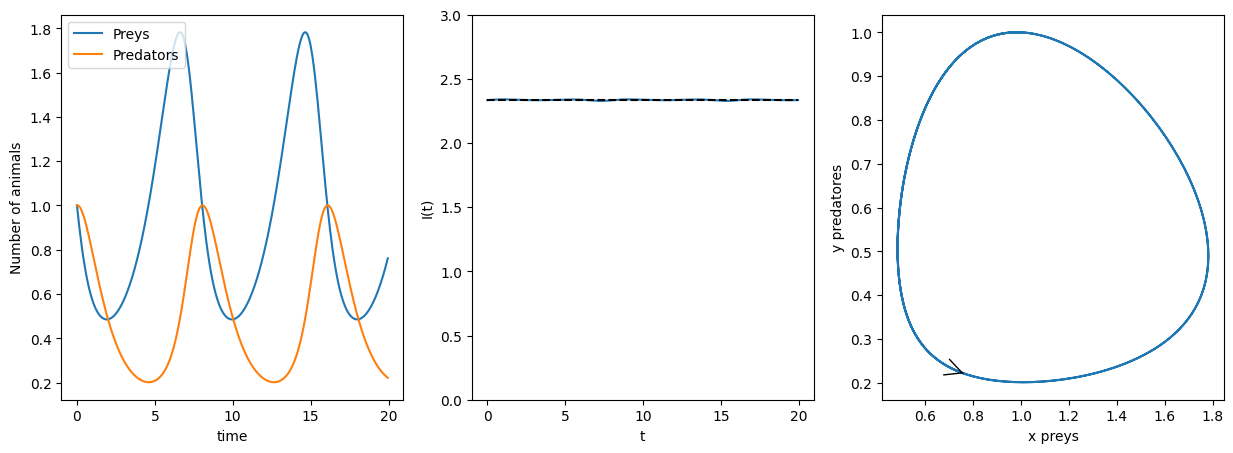

In [113]:
LotkaVolterraModel(SymplecticEulerIntegration)